In [1]:
import sys
import torch
from torch import nn
from torch.utils.data import DataLoader, Subset
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt

import hw5_part1 as hw5

In [2]:
device = hw5.get_device()
model = hw5.NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth"))

Using mps device


<All keys matched successfully>

In [3]:
# print(model.feature_maps_stack[0].weight)
first_layer_conv1 = model.feature_maps_stack[0]

first_layer_conv1_weight = first_layer_conv1.weight.cpu()
# first_layer_conv1_weight_local = [tensor.cpu() for tensor in first_layer_conv1_weight]

print("Filter Weights Shape:", first_layer_conv1_weight.shape)

mnist_global_mean = 0.1307
mnist_global_stdev = 0.3081

_, train_dataloader = hw5.get_dataloaders(mean=mnist_global_mean, stdev=mnist_global_stdev)


Filter Weights Shape: torch.Size([10, 1, 5, 5])
Shape of X [N, C, H, W]: torch.Size([1000, 1, 28, 28])
Shape of y: torch.Size([1000]) torch.int64


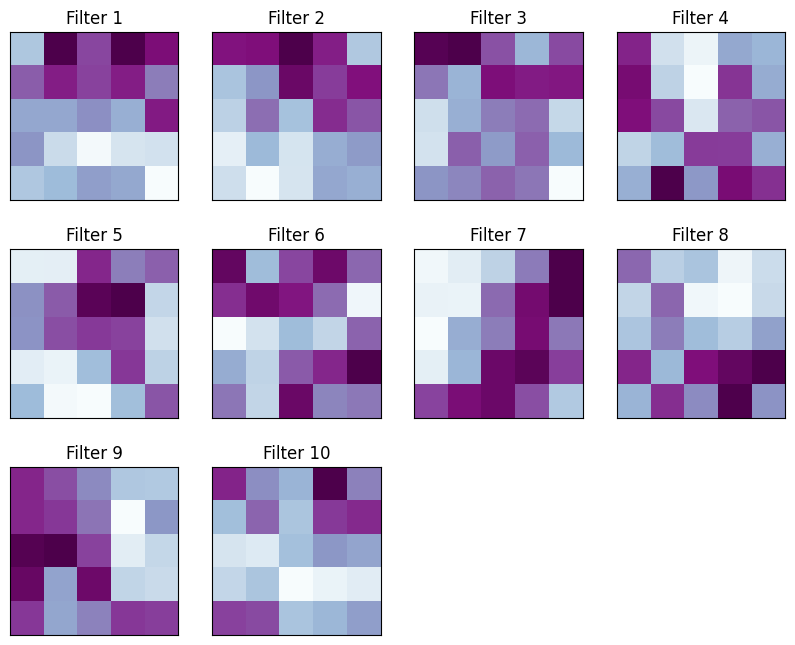

In [4]:
# Visualize the filters using Pyplot
#  https://matplotlib.org/stable/users/explain/colors/colormaps.html
fig = plt.figure(figsize=(10, 8))
for i in range(10):
    plt.subplot(3, 4, i+1)
    plt.imshow(first_layer_conv1_weight[i, 0].detach().numpy(), cmap='BuPu')
    plt.title(f'Filter {i + 1}')
    plt.xticks([]), plt.yticks([])

plt.show()

In [4]:
import cv2
print(cv2.__version__)

for data, _ in train_dataloader:
    first_example = data[0]
    break

# Apply the filters using filter2D
with torch.no_grad():
    filtered_images = []
    for i in range(10):
        # Extract a single filter
        filter_i = first_layer_conv1_weight[i, 0].squeeze().numpy()

        # Apply the filter using filter2D
        filtered_image = cv2.filter2D(first_example.squeeze().numpy(), -1, filter_i)
        
        # Convert back to the range [0, 255]
        filtered_image = ((filtered_image - filtered_image.min()) / (filtered_image.max() - filtered_image.min()) * 255).astype('uint8')

        filtered_images.append(filtered_image)


AttributeError: module 'cv2' has no attribute '__version__'

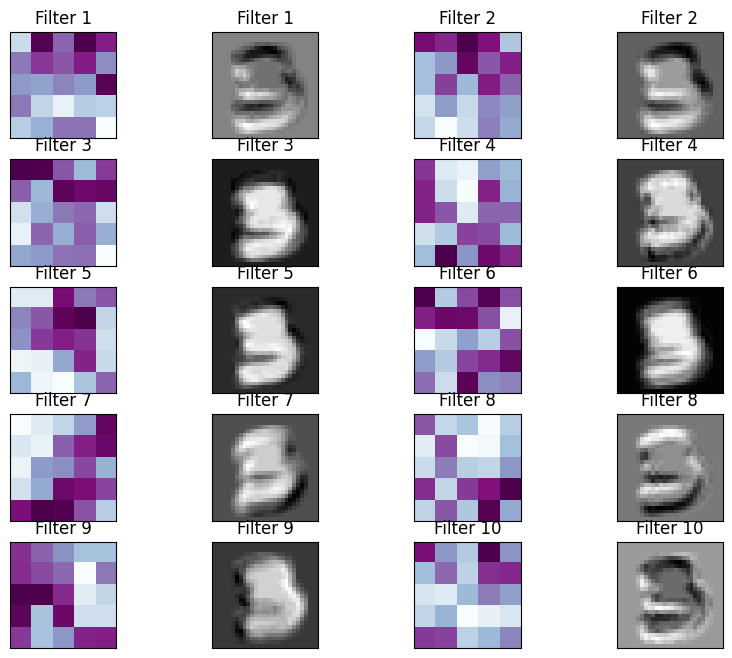

In [36]:
# Visualize the filtered images using Pyplot
fig = plt.figure(figsize=(10, 8))
for i in range(10):
    # plot the filter with conv1 weights
    plt.subplot(5, 4, 2*(i)+1)
    plt.imshow(first_layer_conv1_weight[i, 0].detach().numpy(), cmap='BuPu')
    plt.title(f'Filter {i + 1}')
    plt.xticks([]), plt.yticks([])
    
    # plot the filter2D
    plt.subplot(5, 4, 2*(i+1))
    plt.imshow(filtered_images[i], cmap='gray')
    plt.title(f'Filter {i + 1}')
    plt.xticks([]), plt.yticks([])
    
    

plt.show()